In [20]:
import apc
import pandas as pd

In [21]:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [22]:
data1=pd.read_excel('hello/APC_input3.xlsx',sheet_name='consshare',index_col=0)
data1
#2+household consumption spending as % of average income

,1984,1989,1994,1999,2004,2009,2014
20,73.0,73.0,66.0,69.0,73.0,70,68.0
25,67.0,65.0,60.0,62.0,66.0,63,62.0
30,62.0,60.0,57.0,56.0,59.0,59,56.0
35,59.0,56.0,53.0,52.0,54.0,54,53.0
40,58.0,55.0,52.0,51.0,52.0,51,50.0
45,59.0,56.0,54.0,54.0,55.0,54,52.0
50,57.0,53.0,50.0,52.0,54.0,53,52.0
55,55.0,51.0,48.0,48.0,51.0,50,51.0
60,55.0,54.0,53.0,56.0,58.0,59,58.0
65,55.0,55.0,54.0,56.0,61.0,62,59.0


In [23]:
model=apc.Model()
model.data_from_df(response=data1, data_format='AP',time_adjust=1)
#consumption becomes response, data format is age-period

In [24]:
model.data_vector.tail()
#check for the vector tail

response
Period Age Cohort          
2014   45  1970        52.0
       50  1965        52.0
       55  1960        51.0
       60  1955        58.0
       65  1950        59.0

In [25]:
model._vector_to_array(model.data_vector['response'], space='AC').fillna('')
#align data for age-cohort layout

Cohort,1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
Age,,,,,,,,,,,,,,,,
20,,,,,,,,,,73,73,66,69,73,70,68
25,,,,,,,,,67,65,60,62,66,63,62,
30,,,,,,,,62,60,57,56,59,59,56,,
35,,,,,,,59,56,53,52,54,54,53,,,
40,,,,,,58,55,52,51,52,51,50,,,,
45,,,,,59,56,54,54,55,54,52,,,,,
50,,,,57,53,50,52,54,53,52,,,,,,
55,,,55,51,48,48,51,50,51,,,,,,,
60,,55,54,53,56,58,59,58,,,,,,,,


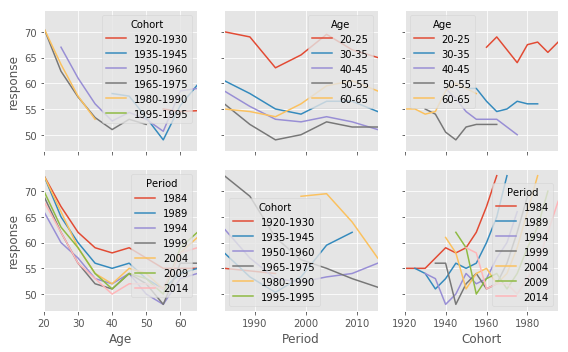

In [26]:
model.plot_data_within(figsize=(8,5),logy=False)
#plot by Age, Perod, Cohort

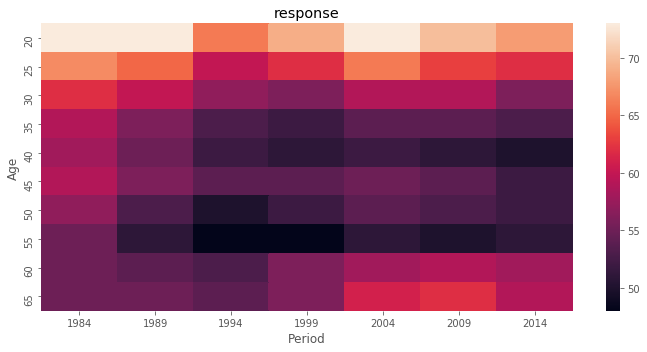

In [27]:
model.plot_data_heatmaps(figsize=(10,5))
#check the heatmap

In [31]:
model.fit_table('log_normal_response')
model.deviance_table.loc[['APC','AP','AC','PC','Ad','Pd','Cd']]
#Fit model and test variation attributable to age-period-cohort interactions.
#A significant F statistic indicates that cohort effects may be present.
#Significant F is not a sufficient condition, merely a necessary condition
#Period-Cohort shows the highest F vs APC

,-2logL,df_resid,LR_vs_APC,df_vs_APC,F_vs_APC,P>F,aic
APC,-377.251,40,NaN,NaN,NaN,NaN,-317.251
AP,-300.201,54,77.05,14,5.73233,6.4883e-06,-268.201
AC,-275.756,45,101.495,5,26.1025,1.28444e-11,-225.756
PC,-172.379,48,204.872,8,88.3333,5.73677e-23,-128.379
Ad,-255.268,59,121.983,19,9.92049,8.76219e-10,-233.268
Pd,-161.903,62,215.348,22,37.6002,3.64365e-20,-145.903
Cd,-164.63,53,212.621,13,61.0827,3.59876e-22,-130.63
